In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.rc('axes', unicode_minus = False)

# 1. 데이터 처리
## 1.1 데이터 불러오기

In [ ]:
df = pd.read_csv('/kaggle/input/volcanic-eruptions/database.csv')
df.head()

## **Feature 설명**

- Type : 화산의 타입


- Activity Evidence : 화산활동의 증거


- Last Known Eruption : 최근 분화
    * BCE : Befor Common Era(= BC)
    + CE : Commom Era(= AD)


- Dominant Rock Type : 화산을 이루고 있는 주 암석


- Tectonic Setting : 지체 구조(지각 변동으로 이루어진 지층의 구성)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

## 1.2 데이터 전처리

In [ ]:
# BCE -> -
# CE -> +

# 함수 생성

def BCE_CE(x):
    if x.split()[-1] == 'BCE':
        out = int(x.split()[0]) * -1
    elif x.split()[-1] == 'CE':
        out = int(x.split()[0])
    else:
        out = np.nan
    return out

In [ ]:
df['Last Known Eruption(year)'] = df['Last Known Eruption'].map(lambda x : BCE_CE(x))
df.head()

In [ ]:
# 나머지 column의 null값 처리
df['Activity Evidence'].fillna('Unknown', inplace = True)
df['Dominant Rock Type'].fillna('Unknown', inplace = True)
df['Tectonic Setting'].fillna('Unknown', inplace = True)

df.isnull().sum()

# 2. EDA

In [ ]:
fig = sns.pairplot(df)

In [ ]:
col_list = df.columns.tolist()
col_list

## 2.1 화산 분포 현황

### 2.1.1 Map

In [ ]:
# 화산 분포도
fig = px.scatter_geo(data_frame= df, lat = 'Latitude', lon = 'Longitude', color= 'Region')
fig.show()

### 2.1.2 Region

In [ ]:
# 화산 분포 지역
values = df['Region'].value_counts()
labels = df['Region'].value_counts().index

fig = go.Figure(go.Pie(values= values, labels= labels))
fig.update_traces(textinfo = 'percent + label', textfont_size= 12
                  ,marker=dict(line=dict(color='#000000', width=1)))
fig.show()

### 2.1.3 Type

In [ ]:
df['Type'].value_counts()

### **Stratovolcano**
    성층 화산(Stratovolcano)은 높고 굳은 용암과 테프라(퇴적한 화산재) 그리고 화산재로 이루어진 여러 층으로 구성된 원뿔형 화산으로 복식화산으로 불리기도 한다. 성층화산은 측면이 가파르며 폭발적인 분출이 주기적으로 일어난다는 것이 특징이다. 성층화산에서 흘러내리는 용암은 점착성이 강해지려는 성향이 있어서 멀리 퍼지기 전에 굳게 된다. 이 용암을 이루는 마그마는 대부분 규장질로 이루어져 있고 많은 중간물을 가지는 규토(점착성이 덜 강한 약간의 마그마로 이루어진)를 가지기도 한다.
 
 
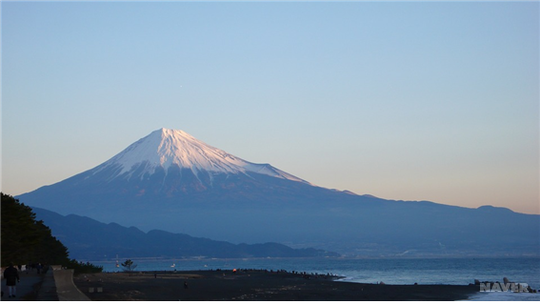

### **Shield volcano**
    순상 화산(Shield volcano)는 비교적 평평한 돔의 형태를 보이며, 너비가 넓고, 높이가 낮은 모습이 방패(shield)와 비슷하다고 하여 순상화산이라 불린다. 순상화산들은 대부분 유동성이 큰 현무암질 용암에 의해 만들어진다


 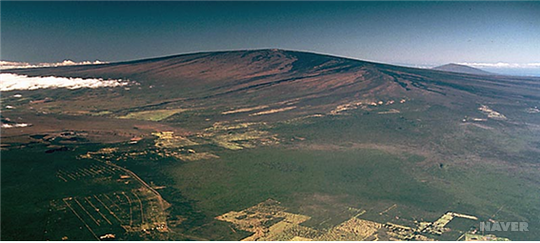
 

### **Submarine volcano**

    해저화산(Submarine volcano)은 대양저에 발달해 있는 화산체를 말한다. 일반적으로 비고 1,000m 정도로 원추형(圓錐形)을 이루며, 화산분출물의 퇴적이나 해저의 융기에 의해 정상부분이 수면 위로 드러나 화산섬이 되기도 한다. 지구의 역사 이래 현재까지 확인된 해저화산은 전 세계적으로 약 200개 정도인데, 그 중에서 약 1/4이 화산섬으로 발달했다고 하나 파도의 침식작용으로 그 대부분이 침식되어 없어졌다.

### **Pyroclastic cone**

    화산쇄설구(Pyroclastic cone)는 폭발적인 화산활동에 의해 강하화쇄물(降下火碎物)이 화구 주위에 쌓여 형성된 원추형 또는 그에 가까운 화산체이다. 10~30°의 직선상의 사면을 갖는 소형화산이다. 비고는 300m 이하, 기저부 직경 2㎞ 이하의 것이 많으며, 주변 기반과는 지형적으로 뚜렷한 경계를 이룬다. 사면은 애추의 발달에 의한 안식각에서 결정된다.

### **Volcanic field**

    A volcanic field is an area of the Earth's crust that is prone to localized volcanic activity. They usually consist of clusters of 10 to 100 volcanoes such as cinder cones. Lava flows may also occur. They may occur as a monogenetic volcanic field or a polygenetic volcanic field.


In [ ]:
# 상위 6개의 화산종류 분포 현황
type_top6 = df['Type'].value_counts().head(6).index.tolist()
type_top6

#### 2.1.3.1 Top 6 of Volcano type

In [ ]:
fig = px.scatter_geo(data_frame= df[df['Type'].isin(type_top6)], 
                     lat = 'Latitude', lon = 'Longitude', color = 'Type',
                    title = 'Top 6 of Volcano type')
fig.show()

## 2.2 Country

### 2.2.1 Top 10 of Country

In [ ]:
fig = px.bar(df['Country'].value_counts().head(10), title = 'Top 10 of Country')
fig.show()

    미국-러시아-인도네시아-일본-칠레 순으로 화산이 많이 분포되어있음

In [ ]:
# Top 10의 화산 분포현황
top10_list = df['Country'].value_counts().head(10).index.tolist()
fig = px.scatter_geo(data_frame= df[df['Country'].isin(top10_list)], 
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Country',
                    title = 'Top 10 of Country with Volcano')
fig.show()

### 2.2.2 Volcano types in USA

In [ ]:
fig = px.scatter_geo(data_frame= df[df['Country'].isin(['United States'])], 
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Type',
                    title = 'Volcano types in USA')
fig.show()

### 2.2.3 Volcano types in Russia

In [ ]:
fig = px.scatter_geo(data_frame= df[df['Country'].isin(['Russia'])], 
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Type',
                    title = 'Volcano types in USA')
fig.show()

## 2.3 Last Known Eruption

In [ ]:
fig = px.histogram(data_frame = df, x = 'Last Known Eruption(year)', marginal= 'rug', nbins=100)
fig.show()

    1600년대 이후 화산활동이 급격히 늘었음

In [ ]:
# 1D 로 표현
y_val = df['Last Known Eruption(year)'].shape[0]

fig = go.Figure(go.Scatter( x = df['Last Known Eruption(year)'], 
                           y = np.zeros(y_val),
                           mode = 'markers' ,marker_size = 10))

fig.add_annotation(x = df['Last Known Eruption(year)'].min(), y= 0, 
                   text = 'First eruption' )

fig.add_annotation(x = df['Last Known Eruption(year)'].max(), y= 0, 
                   text = 'Recent eruption' )

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, 
                 zeroline=True, zerolinecolor='black', 
                 zerolinewidth=5,
                 showticklabels=False)
fig.update_layout(height=300, plot_bgcolor='white')

fig.show()

    최초의 분화는 BC 10450년경, 최근 분화는 2016년임

### 2.3.1 오래전 분화한 화산(100개)?

In [ ]:
fig = px.scatter_geo(data_frame = df.sort_values('Last Known Eruption(year)').head(100),
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Region',
                    title = 'Top 100 of Volcano erupted a long time ago')
fig.show()

### 2.3.2 2016년에  분화한 화산은?

In [ ]:
fig = px.scatter_geo(data_frame = df[df['Last Known Eruption(year)'].isin([2016])],
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Region',
                    title = 'Volcano eruption in 2016')
fig.show()

## 2.4 Elevation
### 2.4.1 가장 높은 화산은?

In [ ]:
#가장 높은 화산은?
df_highest = df.sort_values('Elevation (Meters)', 
               ascending = False).head(10)[['Name', 
                                            'Country', 
                                            'Region', 
                                            'Type',
                                            'Elevation (Meters)' , 
                                            'Latitude','Longitude',
                                           'Last Known Eruption']]

df_highest.style.background_gradient('Reds')

### 2.4.2 가장 낮은 화산은?

In [ ]:
#가장 낮은 화산은?
df_lowest = df.sort_values('Elevation (Meters)', 
               ascending = True).head(10)[['Name', 
                                            'Country', 
                                            'Region', 
                                            'Type',
                                            'Elevation (Meters)',
                                           'Latitude','Longitude',
                                          'Last Known Eruption']]
df_lowest.style.background_gradient('Reds')

In [ ]:
# highest + lowest
df_high_low = pd.concat([df_highest, df_lowest], axis = 0)

fig = px.scatter_geo(df_high_low, lat= 'Latitude', lon= 'Longitude', 
                     color = df_high_low['Elevation (Meters)'] > 0)
fig.update_layout(title = 'Top 10 of Highest & Lowest, Blue : Highest, Red : Lowest')
fig.show()


## 2.5 Dominant Rock Type


In [ ]:
values = df['Dominant Rock Type'].value_counts()
names = df['Dominant Rock Type'].value_counts().index


fig = px.pie(values = values, names= names)
fig.update_traces(textinfo = 'percent + label', textfont_size= 12
                  ,marker=dict(line=dict(color='#000000', width=1)))
fig.show()

    대부분의 암석은 Andesite / Basaltic Andesite와 Basalt / Picro-Basalt 이다.

    Andesite : Andesite is an extrusive rock intermediate in composition between rhyolite and basalt.
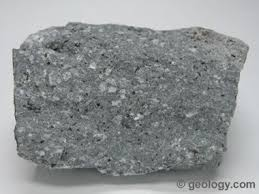

    Basalt : Basalt is a mafic extrusive igneous rock formed from the rapid cooling of lava rich in magnesium and iron exposed at or very near the surface of a terrestrial planet or a moon
    
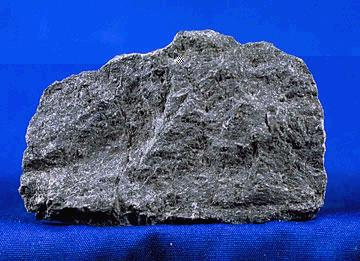

In [ ]:
fig = px.scatter_geo(df[df['Dominant Rock Type'].isin(labels[:2])],
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Dominant Rock Type',
                    title = 'Dominant Rock Type')
fig.show()

## 2.5 Tectonic Setting

In [ ]:
df['Tectonic Setting'].value_counts()

In [ ]:
fig = px.scatter_geo(df,
                     lat = 'Latitude', lon = 'Longitude',
                     color = 'Tectonic Setting',
                    title = 'Tectonic Setting')
fig.show()